### Loading and installing packages

In [271]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow
print(tensorflow.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2.9.1


In [272]:
data = pd.read_csv("data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [273]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [274]:
data.loc[data['Category'] == 'spam']

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


#### Checking null 

In [275]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

### Data pre-processing with visualization

In [276]:
def text_cleaning(texts):
    #Lowercasing the texts
    clean = texts.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    #Removing contractions
    clean = clean.str.replace("'",' ')
    
    #Removing special characters
    clean = clean.str.replace("@[A-Za-z0-9_]+",' ')
    clean = clean.str.replace("#[A-Za-z0-9_]+",' ')
    
    #Removing links
    clean = clean.str.replace(r'http\S+',' ')
    
    #Removing punctuations
    #clean = clean.str.replace(".",' ')
    clean = clean.str.replace('[()!?]',' ')
    clean = clean.str.replace('\[.*?\]',' ')
    
    #Filtering non-alphanumeric
    clean = clean.str.replace("[^a-z0-9]",' ')
    
    # Removing stopwords
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    clean = clean.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
                       
    return clean

In [277]:
data['Cleaned_message'] = text_cleaning(data['Message'])

<ipython-input-276-68e0908992e9>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  clean = clean.str.replace("@[A-Za-z0-9_]+",' ')
<ipython-input-276-68e0908992e9>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  clean = clean.str.replace("#[A-Za-z0-9_]+",' ')
<ipython-input-276-68e0908992e9>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  clean = clean.str.replace(r'http\S+',' ')
<ipython-input-276-68e0908992e9>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  clean = clean.str.replace('[()!?]',' ')
<ipython-input-276-68e0908992e9>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  clean = clean.str.replace('\[.*?\]',' ')
<ipython-input-276-68e0908992e9>:21: FutureWarning: The default value of regex will change from True to False in a fu

In [278]:
#Dropping duplicated
data = data.drop_duplicates()
# Re-indexing
data = data.reset_index(drop=True)

In [279]:
data

,Category,Message,Cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5152,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5153,ham,Will ü b going to esplanade fr home?,b going esplanade fr home
5154,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5155,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


#### Balancing with upsampling

C:\Users\elee0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

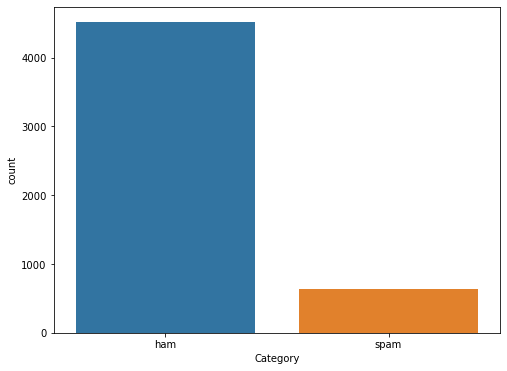

In [280]:
# Current value counts on ham vs spam
plt.figure(figsize=(8,6))
sns.countplot(data['Category'])

In [281]:
from imblearn.over_sampling import RandomOverSampler

In [314]:
# balancing with over sampler
ros = RandomOverSampler()
X = data['Cleaned_message'].values.reshape(-1,1)

# Label encoding
data['Category'] = data.Category.map({'ham':0, 'spam':1})
Y = data['Category'].values.reshape(-1,1)

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, Y)

# assigning to A5
data_OS = pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)],axis=1)
data_OS.columns = ['Cleaned_message','Category']

In [317]:
data_OS

,Cleaned_message,Category
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
...,...,...
9027,18 days euro2004 kickoff u kept informed lates...,1
9028,urgent 1 week free membership 100 000 prize ja...,1
9029,congratulations ur awarded 500 cd vouchers 125...,1
9030,freemsg hi baby wow got new cam moby wanna c h...,1


C:\Users\elee0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

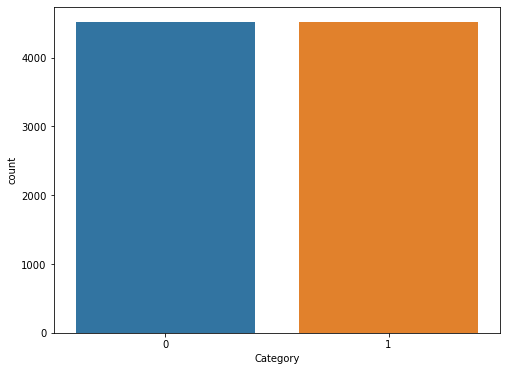

In [318]:
plt.figure(figsize=(8,6))
sns.countplot(data_OS['Category'])

#### Tokenization with padding

In [377]:
num_words = 1000
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data_OS['Cleaned_message'])

# Word index
word_index = tokenizer.word_index

# Data into sequence
train_seq = tokenizer.texts_to_sequences(data_OS['Cleaned_message'])

# Maximum length
max_length = max([len(x) for x in train_seq])

# Pad the sequence
X = pad_sequences(train_seq, padding='post',truncating='post', maxlen=max_length)

print(X.shape)
print(Y.shape)

(9032, 78)
(5157, 1)


### Model training

In [378]:
# Train test spilit
Y = data_OS['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6774, 78) (6774,)
(2258, 78) (2258,)


#### CNN (Global average pooling)

In [466]:
model = tensorflow.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,32,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    #tf.keras.layers.BatchNormalization()
    ])

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [468]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_test, Y_test),callbacks=[reduceLR])

Epoch 1/10
106/106 [==============================] - 1s 2ms/step - loss: 0.6760 - accuracy: 0.5179 - val_loss: 0.6548 - val_accuracy: 0.6081 - lr: 0.0010
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 0.6222 - accuracy: 0.7722 - val_loss: 0.5860 - val_accuracy: 0.9092 - lr: 0.0010
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8965 - val_loss: 0.4937 - val_accuracy: 0.9030 - lr: 0.0010
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.9095 - val_loss: 0.4069 - val_accuracy: 0.9203 - lr: 0.0010
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.9226 - val_loss: 0.3359 - val_accuracy: 0.9247 - lr: 0.0010
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.9296 - val_loss: 0.2822 - val_accuracy: 0.9318 - lr: 0.0010
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - lo

In [469]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

71/71 [==============================] - 0s 657us/step - loss: 0.1691 - accuracy: 0.9606
Test loss: 0.1690620630979538
Test accuracy: 0.9605845808982849


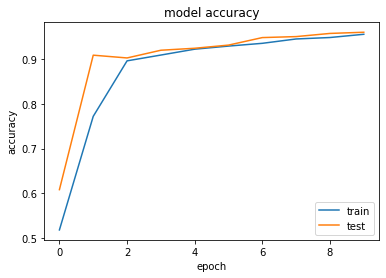

In [470]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

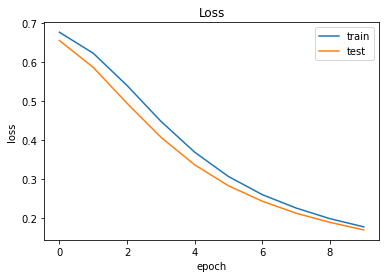

In [471]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [472]:
threshold = 0.5

result = model.predict(X_test)
result = result > threshold
result = result.astype(int)

71/71 [==============================] - 0s 600us/step


In [473]:
target_names = ['ham','spam']
print(classification_report(Y_test, result, target_names=target_names))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96      1129
        spam       0.99      0.93      0.96      1129

    accuracy                           0.96      2258
   macro avg       0.96      0.96      0.96      2258
weighted avg       0.96      0.96      0.96      2258



In [474]:
cm = confusion_matrix(Y_test, result)
cm_df = pd.DataFrame(cm,
                     index = target_names, 
                     columns = target_names)
cm_df

,ham,spam
ham,1115,14
spam,75,1054


#### RNN 

In [461]:
model2 = tensorflow.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,32,input_length=max_length),
    tf.keras.layers.SimpleRNN(100),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

from keras.callbacks import ReduceLROnPlateau
reduceLR = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=3,verbose=0,min_lr=0.0001)

In [462]:
history2 = model2.fit(X_train, Y_train, epochs=10, batch_size=64,validation_data=(X_test, Y_test),callbacks=[reduceLR])

Epoch 1/10
106/106 [==============================] - 2s 15ms/step - loss: 0.2825 - accuracy: 0.8962 - val_loss: 0.1313 - val_accuracy: 0.9535 - lr: 0.0010
Epoch 2/10
106/106 [==============================] - 2s 15ms/step - loss: 0.1811 - accuracy: 0.9339 - val_loss: 0.1280 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 3/10
106/106 [==============================] - 1s 14ms/step - loss: 0.0625 - accuracy: 0.9836 - val_loss: 0.0463 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 4/10
106/106 [==============================] - 2s 15ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0512 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 5/10
106/106 [==============================] - 1s 14ms/step - loss: 0.0389 - accuracy: 0.9895 - val_loss: 0.1069 - val_accuracy: 0.9588 - lr: 0.0010
Epoch 6/10
106/106 [==============================] - 2s 14ms/step - loss: 0.0452 - accuracy: 0.9875 - val_loss: 0.0679 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 7/10
106/106 [==============================] - 2s 14ms/st

In [475]:
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.04130496829748154
Test accuracy: 0.9920283555984497


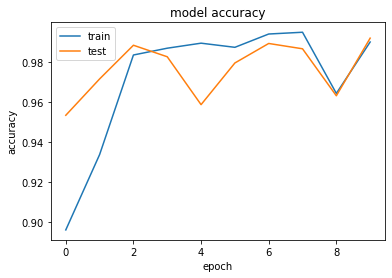

In [476]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

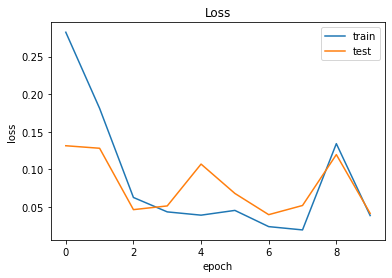

In [477]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [478]:
result2 = model2.predict(X_test)
result2 = result2 > threshold
result2 = result2.astype(int)

71/71 [==============================] - 0s 3ms/step


In [479]:
target_names = ['ham','spam']
print(classification_report(Y_test, result2, target_names=target_names))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1129
        spam       0.99      1.00      0.99      1129

    accuracy                           0.99      2258
   macro avg       0.99      0.99      0.99      2258
weighted avg       0.99      0.99      0.99      2258



In [480]:
cm = confusion_matrix(Y_test, result2)
cm_df = pd.DataFrame(cm,
                     index = target_names, 
                     columns = target_names)
cm_df

,ham,spam
ham,1114,15
spam,3,1126


### Model evaluation

In [481]:
predict = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
          "RE: Unusual Activity : We've suspend your Pαypαl accοunt due to billing issue.We weren't able to process billing payment due to a problem with your card.This means your account are on hold.To update your Pαypαl account, please verify with link below: http://www.xprswebsite.com/free/usr26/mail/?=44480286You need to take action within 24 hours before account will be suspended.Regards,Pαypαl Teams This info sent from 118.115.129.233",
          "FRM:PNC.Banking-CALL 8482911330 to confirm SUBJ:#TXT-MSG-8q02# MSG:Did You Attempt a Zelle payment for $43.55 to John  TXT:722"
          ]

In [482]:
def predict_spam(predict):
    new_seq = tokenizer.texts_to_sequences(predict)
    padded = pad_sequences(new_seq, maxlen =max_length,
                      padding = 'post',
                      truncating='post')
    return (model.predict(padded),model2.predict(padded))
predict_spam(predict)

1/1 [==============================] - 0s 13ms/step


(array([[0.9960059 ],
        [0.99925864],
        [0.93910223]], dtype=float32),
 array([[0.99689585],
        [0.01020772],
        [0.94706595]], dtype=float32))